# Tabla de Contenido

<a id='tabla'></a>

* [1. Carga de Archivos](#as1)
    * [1.1. Lectura de Información de archivos](#as2)
    * [1.2. Lectura de Información de tablas](#as3)
    * [1.3. Visualización de DataFrames](#as4)
    * [1.4. Procesar datos antes de realizar métricas](#as5)
* [2. Visitas](#as6)
    * [2.1. ¿Cuántas personas lo usan cada día, semana y mes?](#as7)
    * [2.2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)](#as8)
    * [2.3. ¿Cuál es la duración de cada sesión?](#as9)
    * [2.4. ¿Con qué frecuencia los usuarios regresan?](#as10)
* [3. Ventas](#as11)
    * [3.1. ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)](#as12)
    * [3.2. ¿Cuántos pedidos hacen durante un período de tiempo dado?](#as13)
    * [3.3. ¿Cuál es el tamaño promedio de compra?](#as14)
    * [3.4. ¿Cuánto dinero traen? (LTV)](#as15)
* [4. Marketing](#as16)
    * [4.1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) ](#as17)
    * [4.2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?](#as18)
    * [4.3. ¿Cuán rentables eran las inversiones? (ROMI)](#as19)
* [5. Calculando algunas métricas ya realizadas por dispositivo y fuentes](#as20)
    * [5.1. Calcular Usuarios únicos por dispositivos y fuente adquisición ](#as21)
    * [5.2. Dinero gastado por dispositivos y fuente adquisición](#as22)
* [5. Conclusiones](#as22)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from IPython.display import display_html
from scipy.stats import ttest_ind


# 1. Carga de Archivos <a id='as1'></a>

#### 1.1. Lectura de archivos <a id='as2'></a>

> Agregar bloque entrecomillado



In [ ]:
# Carga los archivos de datos

from google.colab import files
uploaded = files.upload()

Saving costs_us.csv to costs_us.csv
Saving orders_log_us.csv to orders_log_us.csv
Saving visits_log_us.csv to visits_log_us.csv


In [ ]:
# Leer los archivos CSV y asignarles nombres

visits_us = pd.read_csv('visits_log_us.csv')  # Nuevo nombre para este archivo
orders_us = pd.read_csv('orders_log_us.csv')  # Nuevo nombre para este archivo
costs_us = pd.read_csv('costs_us.csv')        # Nuevo nombre para este archivo

#### 1.2. Lectura de información de la tabla <a id='as2'></a>

In [ ]:
visits_us.info()
print()
orders_us.info()
print()
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  

In [ ]:
#Verificando si hay duplicados

visits_us.duplicated(keep=False).sum()

0

In [ ]:
#Verificando si hay duplicados

orders_us.duplicated(keep=False).sum()

0

In [ ]:
#Verificando si hay duplicados

costs_us.duplicated(keep=False).sum()

0

#### 1.3. Visualización de DataFrames <a id='as4'></a>

In [ ]:
visits_us.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
orders_us.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


#### 1.4. Procesar datos antes de realizar métricas <a id='as5'></a>

In [ ]:
# Bucle en los encabezados eliminando los espacios de Data Frame visits_us

new_columns = []

for old_col in visits_us.columns:
    name_columns = old_col.lower()
    name_strip =  name_columns.strip()
    new_columns.append(name_strip)

visits_us.columns = new_columns
print(visits_us.columns)

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')


In [ ]:
# Lista para almacenar los nuevos nombres de columnas de Data Frame visits_us

new_columns = []

# Iterar sobre las columnas actuales
for col in visits_us.columns:
    # Convertir a minúsculas y reemplazar espacios por guiones bajos
    new_col = col.lower().replace(' ', '_')
    new_columns.append(new_col)

# Asignar los nuevos nombres al DataFrame
visits_us.columns = new_columns

# Mostrar las columnas actualizadas
print(visits_us.columns)


Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [ ]:
# Bucle en los encabezados eliminando los espacios de Data Frame visits_us

new_columns = []

for old_col in orders_us.columns:
    name_columns = old_col.lower()
    name_strip =  name_columns.strip()
    new_columns.append(name_strip)

orders_us.columns = new_columns
print(orders_us.columns)

Index(['buy ts', 'revenue', 'uid'], dtype='object')


In [ ]:
# Lista para almacenar los nuevos nombres de columnas de Data Frame orders_us

new_columns = []

# Iterar sobre las columnas actuales
for col in orders_us.columns:
    # Convertir a minúsculas y reemplazar espacios por guiones bajos
    new_col = col.lower().replace(' ', '_')
    new_columns.append(new_col)

# Asignar los nuevos nombres al DataFrame
orders_us.columns = new_columns

# Mostrar las columnas actualizadas
print(orders_us.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


# 2.Visitas <a id='as6'></a>

#### 2.1 ¿Cuántas personas lo usan cada día, semana y mes? <a id='as7'></a>

In [ ]:
visits_us['start_ts']=  pd.to_datetime(visits_us['start_ts'])
visits_us['end_ts']=  pd.to_datetime(visits_us['end_ts'])
visits_us['start_ts_date'] = visits_us['start_ts'].dt.date
visits_us['start_ts_week'] = visits_us['start_ts'].dt.isocalendar().week
visits_us['start_ts_month'] = visits_us['start_ts'].dt.month
visits_us['start_ts_year'] = visits_us['start_ts'].dt.year

In [ ]:
visits_us.head()

,device,end_ts,source_id,start_ts,uid,start_ts_date,start_ts_week,start_ts_month,start_ts_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


In [ ]:
# Calcular DAU: Usuarios únicos por día
dau_total = visits_us.groupby(['start_ts_date']).agg({'uid': 'nunique'})

dau_total.head(n=10)

,uid
start_ts_date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820
2017-06-06,797
2017-06-07,699
2017-06-08,868
2017-06-09,695


In [ ]:
# Calcular DAU: Usuarios únicos por semana
wau_total = visits_us.groupby(['start_ts_year','start_ts_week']).agg({'uid': 'nunique'})

wau_total.head(n=10)

uid
start_ts_year start_ts_week      
2017          22             2021
              23             4129
              24             2812
              25             2878
              26             3064
              27             3294
              28             4355
              29             3841
              30             2655
              31             2364

In [ ]:
# Calcular MAU: Usuarios únicos por mes
mau_total = visits_us.groupby(['start_ts_year','start_ts_month']).agg({'uid': 'nunique'})

mau_total.head(n=10)

uid
start_ts_year start_ts_month       
2017          6               13259
              7               14183
              8               11631
              9               18975
              10              29692
              11              32797
              12              31557
2018          1               28716
              2               28749
              3               27473

#### 2.2.¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión). <a id='as8'></a>

In [ ]:
# Agrupamos por año y por dia:
# Contamos las filas para cada grupo (incluye repeticiones del mismo usuario) con count y número de valores únicos de uid para cada grupo con nunique

sessions_per_user = visits_us.groupby(['start_ts_year', 'start_ts_date']).agg(
    {'uid': ['count', 'nunique']}
)

# Renombramos columnas

sessions_per_user.columns = ['num_sessions', 'num_users']

# Dividimos en total sesiones entre el numero total de usuarios en total

sessions_per_user['sessions_per_user'] = (
    sessions_per_user['num_sessions'] / sessions_per_user['num_users']
)
sessions_per_user.head(n=10)

num_sessions  num_users  sessions_per_user
start_ts_year start_ts_date                                            
2017          2017-06-01              664        605           1.097521
              2017-06-02              658        608           1.082237
              2017-06-03              477        445           1.071910
              2017-06-04              510        476           1.071429
              2017-06-05              893        820           1.089024
              2017-06-06              875        797           1.097867
              2017-06-07              788        699           1.127325
              2017-06-08              939        868           1.081797
              2017-06-09              755        695           1.086331
              2017-06-10              375        350           1.071429

**Observación:** Podemos observar que el promedio de sesión por cada usuario es de 1.1 sesiones en un día. Nos permite considerar esta frecuencia para
estudios o campañas que vayamos a realizar a futuro.

#### 2.3.¿Cuál es la duración de cada sesión?. <a id='as9'></a>

In [ ]:
visits_us['session_duration_sec'] = (visits_us['end_ts']- visits_us['start_ts']).dt.seconds

visits_us_session = visits_us[['uid','start_ts','end_ts','session_duration_sec']]

visits_us_session.head(n=10)

,uid,start_ts,end_ts,session_duration_sec
0,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,1080
1,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,1680
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,0
3,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,1440
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,0
5,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,60
6,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,3360
7,11423865690854540312,2017-11-05 15:14:00,2017-11-05 15:15:00,60
8,2987360259350925644,2017-07-19 10:41:00,2017-07-19 10:44:00,180
9,1289240080042562063,2017-11-08 13:42:00,2017-11-08 13:43:00,60


<Axes: >

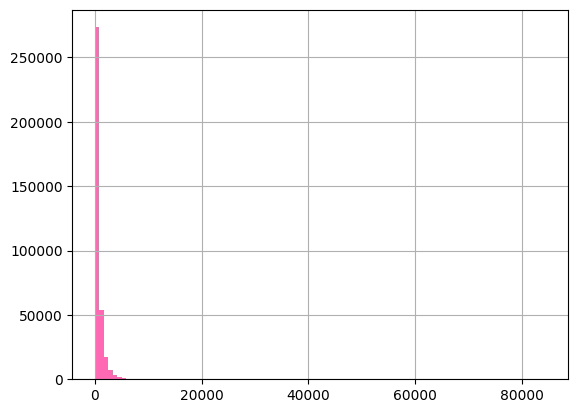

In [ ]:
visits_us_session['session_duration_sec'].hist(bins=100, color='hotpink')


Cuando la distribución es normal o casi normal, puedes tomar la media o la mediana. Pero en nuestro caso es imposible, entonces tenemos que calcular la moda:

In [ ]:
display(visits_us_session['session_duration_sec'].mode())

,session_duration_sec
0,60


**Observación:** Podemos observar que la duración de la sesión es de 60 segundos en los usuarios, es decir 1 minuto. Al ser una página que vende entradas para eventos, este tiempo puede ser bueno o malo dependiendo de otras métricas, por ejemplo la cantidad de compras por sesión, considerando la cantidad de sesiones por usuario.
Si este indicativo de compras nos arroja un buen feedback, quizás 1 minuto si esta siendo suficiente para que el usuario pueda realizar una compra
en concreto, en caso contrario la página no estaria siendo clara con su información, o quizás las promociones o eventos que se ofrecen no son lo suficientemente atractivas.

#### 2.4. ¿Con qué frecuencia los usuarios regresan? <a id='as10'></a>

In [ ]:
# Encontrar la primera fecha de actividad de cada usuario

firts_activity_date = visits_us.groupby('uid')['start_ts'].min()
firts_activity_date.name = 'first_activity_date'

display(firts_activity_date)

,first_activity_date
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00
...,...
18446403737806311543,2017-11-30 03:36:00
18446424184725333426,2017-12-06 20:32:00
18446556406699109058,2018-01-01 16:29:00


In [ ]:
# Unión de la primera fecha de actividad con los datos de actividad del usuario

user_activity = visits_us.join(firts_activity_date, on='uid')

user_activity = user_activity.loc[:, ['uid','start_ts_date','first_activity_date']]

display(user_activity)


,uid,start_ts_date,first_activity_date
0,16879256277535980062,2017-12-20,2017-12-20 17:20:00
1,104060357244891740,2018-02-19,2018-02-19 16:53:00
2,7459035603376831527,2017-07-01,2017-07-01 01:54:00
3,16174680259334210214,2018-05-20,2018-03-09 20:05:00
4,9969694820036681168,2017-12-27,2017-12-27 14:06:00
...,...,...,...
359395,18363291481961487539,2017-07-29,2017-07-29 19:07:00
359396,18370831553019119586,2018-01-25,2018-01-25 17:38:00
359397,18387297585500748294,2018-03-03,2018-03-03 10:12:00
359398,18388616944624776485,2017-11-02,2017-11-02 10:12:00


In [ ]:
user_activity_month = user_activity.copy()

# Cálculo del mes y año para cada fecha de actividad

user_activity['start_ts_date'] = pd.to_datetime(user_activity['start_ts_date'])

user_activity_month['activity_month'] = user_activity['start_ts_date'].dt.to_period('M')

display(user_activity_month)


,uid,start_ts_date,first_activity_date,activity_month
0,16879256277535980062,2017-12-20,2017-12-20 17:20:00,2017-12
1,104060357244891740,2018-02-19,2018-02-19 16:53:00,2018-02
2,7459035603376831527,2017-07-01,2017-07-01 01:54:00,2017-07
3,16174680259334210214,2018-05-20,2018-03-09 20:05:00,2018-05
4,9969694820036681168,2017-12-27,2017-12-27 14:06:00,2017-12
...,...,...,...,...
359395,18363291481961487539,2017-07-29,2017-07-29 19:07:00,2017-07
359396,18370831553019119586,2018-01-25,2018-01-25 17:38:00,2018-01
359397,18387297585500748294,2018-03-03,2018-03-03 10:12:00,2018-03
359398,18388616944624776485,2017-11-02,2017-11-02 10:12:00,2017-11


In [ ]:
activity_month = user_activity_month.copy()

# Cálculo del mes y año para cada fecha de la primera actividad

activity_month['first_activity_month'] = user_activity_month['first_activity_date'].dt.to_period('M')

display(activity_month)

,uid,start_ts_date,first_activity_date,activity_month,first_activity_month
0,16879256277535980062,2017-12-20,2017-12-20 17:20:00,2017-12,2017-12
1,104060357244891740,2018-02-19,2018-02-19 16:53:00,2018-02,2018-02
2,7459035603376831527,2017-07-01,2017-07-01 01:54:00,2017-07,2017-07
3,16174680259334210214,2018-05-20,2018-03-09 20:05:00,2018-05,2018-03
4,9969694820036681168,2017-12-27,2017-12-27 14:06:00,2017-12,2017-12
...,...,...,...,...,...
359395,18363291481961487539,2017-07-29,2017-07-29 19:07:00,2017-07,2017-07
359396,18370831553019119586,2018-01-25,2018-01-25 17:38:00,2018-01,2018-01
359397,18387297585500748294,2018-03-03,2018-03-03 10:12:00,2018-03,2018-03
359398,18388616944624776485,2017-11-02,2017-11-02 10:12:00,2017-11,2017-11


In [ ]:
# Cálculo del ciclo de vida de la cohorte en meses

activity_cohort_lifetime = activity_month.copy()

# Usamos .apply(lambda x: x.n) para obtener la diferencia como un número entero.

activity_cohort_lifetime['cohort_lifetime'] = (activity_month['activity_month'] - activity_month['first_activity_month']).apply(lambda x: x.n)

display(activity_cohort_lifetime)

,uid,start_ts_date,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,16879256277535980062,2017-12-20,2017-12-20 17:20:00,2017-12,2017-12,0
1,104060357244891740,2018-02-19,2018-02-19 16:53:00,2018-02,2018-02,0
2,7459035603376831527,2017-07-01,2017-07-01 01:54:00,2017-07,2017-07,0
3,16174680259334210214,2018-05-20,2018-03-09 20:05:00,2018-05,2018-03,2
4,9969694820036681168,2017-12-27,2017-12-27 14:06:00,2017-12,2017-12,0
...,...,...,...,...,...,...
359395,18363291481961487539,2017-07-29,2017-07-29 19:07:00,2017-07,2017-07,0
359396,18370831553019119586,2018-01-25,2018-01-25 17:38:00,2018-01,2018-01,0
359397,18387297585500748294,2018-03-03,2018-03-03 10:12:00,2018-03,2018-03,0
359398,18388616944624776485,2017-11-02,2017-11-02 10:12:00,2017-11,2017-11,0


In [ ]:
cohorts = activity_cohort_lifetime.groupby(['first_activity_month','cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

display(cohorts)

,first_activity_month,cohort_lifetime,uid
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909
...,...,...,...
73,2018-03,1,861
74,2018-03,2,557
75,2018-04,0,15709
76,2018-04,1,760


In [ ]:
# Cálculo del número inicial de usuarios en cada cohorte

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0]

initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users_initial'}).reset_index(drop=True)

display(initial_users_count)

,first_activity_month,cohort_lifetime,cohort_users_initial
0,2017-06,0,13259
1,2017-07,0,13140
2,2017-08,0,10181
3,2017-09,0,16704
4,2017-10,0,25977
5,2017-11,0,27248
6,2017-12,0,25268
7,2018-01,0,22624
8,2018-02,0,22197
9,2018-03,0,20589


In [ ]:
# Realizar la fusión de las dos tablas usando la columna 'first_activity_month'

cohorts_merge = cohorts.merge(initial_users_count, on='first_activity_month', how='left', suffixes=('', '_initial'))

display(cohorts_merge)

,first_activity_month,cohort_lifetime,uid,cohort_lifetime_initial,cohort_users_initial
0,2017-06,0,13259,0,13259
1,2017-06,1,1043,0,13259
2,2017-06,2,713,0,13259
3,2017-06,3,814,0,13259
4,2017-06,4,909,0,13259
...,...,...,...,...,...
73,2018-03,1,861,0,20589
74,2018-03,2,557,0,20589
75,2018-04,0,15709,0,15709
76,2018-04,1,760,0,15709


In [ ]:
# Cálculo de la tasa de retención

cohorts_merge['retention'] = cohorts_merge['uid'] / cohorts_merge['cohort_users_initial']

display(cohorts_merge)

,first_activity_month,cohort_lifetime,uid,cohort_lifetime_initial,cohort_users_initial,retention
0,2017-06,0,13259,0,13259,1.000000
1,2017-06,1,1043,0,13259,0.078664
2,2017-06,2,713,0,13259,0.053775
3,2017-06,3,814,0,13259,0.061392
4,2017-06,4,909,0,13259,0.068557
...,...,...,...,...,...,...
73,2018-03,1,861,0,20589,0.041818
74,2018-03,2,557,0,20589,0.027053
75,2018-04,0,15709,0,15709,1.000000
76,2018-04,1,760,0,15709,0.048380


In [ ]:
# Creación de la tabla dinámica de retención

retention_pivot = cohorts_merge.pivot_table(index='first_activity_month', columns='cohort_lifetime', values='retention', aggfunc='sum')

display(retention_pivot)


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Cohorts: User Retention'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

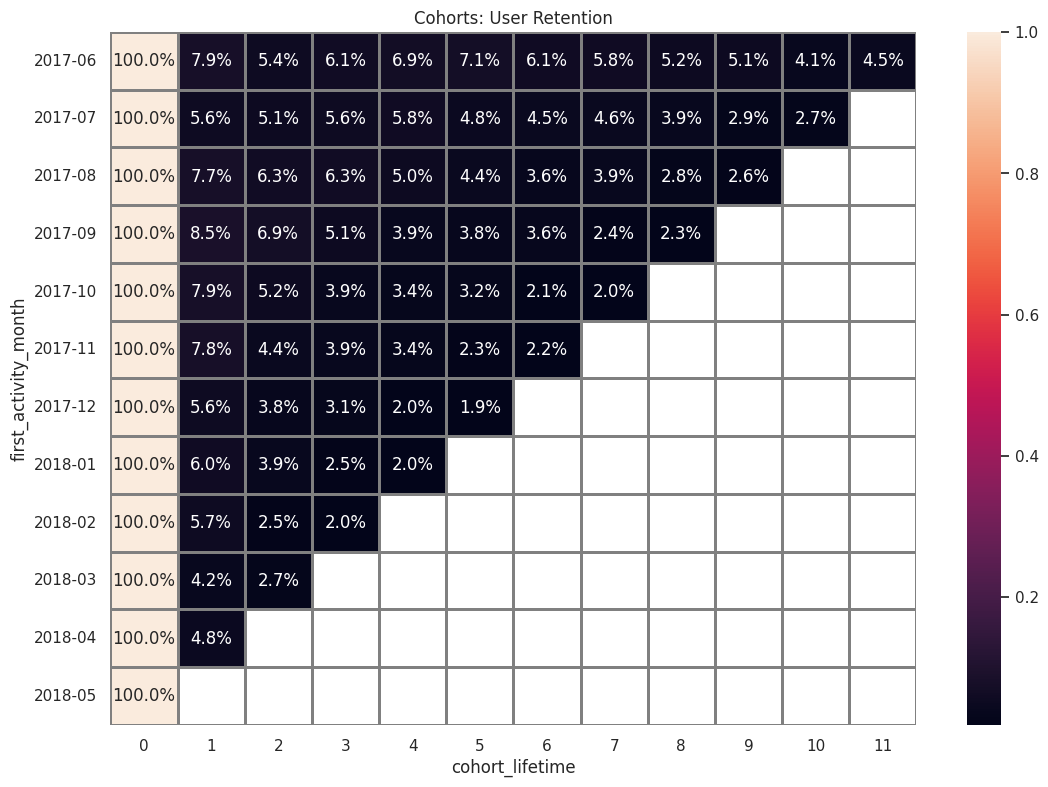

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
)

**Observación:** Observamos que la frecuencia con que regresan va disminuyendo a lo largo del tiempo, no hay un incremento. La tasa de retención no supera el 10% en ningún caso en los meses posteriores. Nos puede indicar un desinterés en querer volver a la página ya sea porque los eventos ofrecidos no sean lo suficientemente atractivos, los precios o promociones tampoco lo sean, probablemente la información proporcionada en la página no esté siendo clara para el usuario.

# 3. Ventas  <a id='as11'></a>

#### 3.1 ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)  <a id='as12'></a>

In [ ]:
# Cantidad de valores únicos en cada tabla

display(f"Valores únicos en visits: {visits_us['uid'].nunique()}")
display(f"Valores únicos en orders: {orders_us['uid'].nunique()}")

# Valores compartidos entre ambas tablas

uids_visits = set(visits_us['uid'])
uids_orders = set(orders_us['uid'])

# Realiza una intersección entre los dos conjuntos (uids_visits y uids_orders), devolviendo solo los valores que están presentes en ambos.

uids_comunes = uids_visits & uids_orders
print(f"Valores comunes: {len(uids_comunes)}")


'Valores únicos en visits: 228169'

'Valores únicos en orders: 36523'

Valores comunes: 36523


In [ ]:
# Hacemos union de la tabla de vistas con ordenes por uid

visits_orders = pd.merge(visits_us, orders_us, on='uid', how='left')

display(visits_orders)

,device,end_ts,source_id,start_ts,uid,start_ts_date,start_ts_week,start_ts_month,start_ts_year,session_duration_sec,buy_ts,revenue
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080,NaN,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680,NaN,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0,NaN,NaN
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440,2018-03-09 20:25:00,2.33
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1023808,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,19,2018-01-25 17:38:00,2.93
1023809,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,19,2018-01-25 22:29:00,0.37
1023810,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018,19,2018-03-03 10:12:00,0.61
1023811,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017,19,2017-11-02 10:12:00,2.69


In [ ]:
# Filtramos valores de la tabla que nos interesa unicamente

visits_orders_us = visits_orders.loc[:, ['uid','end_ts','start_ts','buy_ts']]

display(visits_orders_us)


,uid,end_ts,start_ts,buy_ts
0,16879256277535980062,2017-12-20 17:38:00,2017-12-20 17:20:00,NaN
1,104060357244891740,2018-02-19 17:21:00,2018-02-19 16:53:00,NaN
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,NaN
3,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,NaN
...,...,...,...,...
1023808,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00
1023809,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00
1023810,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00
1023811,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00


In [ ]:
# Eliminamos valores nulos, ya que nos interesa solo los que hicieron pedidos, que en buy_ts no sea NaN

visits_orders_notna = visits_orders_us.copy()

visits_orders_notna = visits_orders_notna.dropna(subset=['buy_ts']).reset_index(drop=True)

display(visits_orders_notna)


,uid,end_ts,start_ts,buy_ts
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00
...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00


In [ ]:
# Obtener el registro de la primera sesión por cada usuario (uid)

first_sessions = visits_orders_notna.groupby('uid')['start_ts'].min().reset_index()

display(first_sessions)

,uid,start_ts
0,313578113262317,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00
3,2464366381792757,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:48:00
36520,18445601152732270159,2017-08-07 11:51:00
36521,18446156210226471712,2017-11-07 10:01:00


In [ ]:
# Renombramos la columna start_ts a registration_date

first_sessions_rg = first_sessions.copy()

first_sessions_rg = first_sessions_rg.rename(columns={'start_ts': 'registration_date'})

display(first_sessions_rg)

,uid,registration_date
0,313578113262317,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00
3,2464366381792757,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:48:00
36520,18445601152732270159,2017-08-07 11:51:00
36521,18446156210226471712,2017-11-07 10:01:00


In [ ]:
# Hacemos union con nuestra tabla visits_orders_notna que contiene todos los pedidos de clientes con first_sessions_rg que contiene el campo del primer registro de usuario

visits_orders_full = pd.merge(visits_orders_notna, first_sessions_rg, on='uid', how='left')

display(visits_orders_full)

,uid,end_ts,start_ts,buy_ts,registration_date
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2018-03-09 20:05:00
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-03 21:35:00
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,2017-09-03 21:35:00
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,2017-09-03 21:35:00
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,2017-06-04 14:17:00
...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01-25 17:38:00
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,2018-01-25 17:38:00
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03-03 10:12:00
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11-02 10:12:00


In [ ]:
# Creamos una columna para calcular la conversión de dias transcurridos desde de la fecha de registro hasta la fecha de pedido

orders_buy = visits_orders_full.copy()

orders_buy['buy_ts'] = pd.to_datetime(orders_buy['buy_ts'])
orders_buy['registration_date'] = pd.to_datetime(orders_buy['registration_date'])

orders_buy['conversion_days'] = (orders_buy['buy_ts'] - orders_buy['registration_date']).dt.days

display(orders_buy)


,uid,end_ts,start_ts,buy_ts,registration_date,conversion_days
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2018-03-09 20:05:00,0
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-03 21:35:00,0
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,2017-09-03 21:35:00,54
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,2017-09-03 21:35:00,54
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,2017-06-04 14:17:00,20
...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01-25 17:38:00,0
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,2018-01-25 17:38:00,0
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03-03 10:12:00,0
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11-02 10:12:00,0


In [ ]:
# Evaluar valor maximo de conversion day

orders_buy_max = orders_buy['conversion_days'].max()

display(orders_buy_max)

364

In [ ]:
orders_buy_category = orders_buy.copy()

# Función para caetgorizar los dias de conversión

def categorize_conversion(days):

    if days == 0:
        return '0 day'
    elif days == 1:
        return '1 day'
    elif days >= 2 and days <=30:
        return '(2-30) days'
    elif days >= 31 and days <=60:
        return '(31-61) days'
    elif days >= 61 and days <=90:
        return '(61-90) days'
    elif days >= 91 and days <=120:
        return '(91-120) days'
    elif days >= 121 and days <=150:
        return '(121-150) days'
    elif days >= 151 and days <=180:
        return '(151-180) days'
    elif days >= 181 and days <=210:
        return '(181-210) days'
    elif days >= 211 and days <=240:
        return '(211-240) days'
    elif days >= 241 and days <=270:
        return '(241-270) days'
    elif days >= 271 and days <=300:
        return '(271-150) days'
    else:
        return '(301-364) days'

# Aplicar la función a nuestra dataframe orders_buy_category

orders_buy_category['conversion_category'] = orders_buy_category['conversion_days'].apply(categorize_conversion)

display(orders_buy_category)


,uid,end_ts,start_ts,buy_ts,registration_date,conversion_days,conversion_category
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2018-03-09 20:05:00,0,0 day
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-03 21:35:00,0,0 day
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,2017-09-03 21:35:00,54,(31-61) days
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,2017-09-03 21:35:00,54,(31-61) days
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,2017-06-04 14:17:00,20,(2-30) days
...,...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01-25 17:38:00,0,0 day
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,2018-01-25 17:38:00,0,0 day
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03-03 10:12:00,0,0 day
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11-02 10:12:00,0,0 day


In [ ]:
# Contar la frecuencia de los valores únicos en una columna

conversion_distribution = orders_buy_category['conversion_category'].value_counts()

# Convertir el resultado de value_counts() a un DataFrame y renombrar la columna

conversion_distribution = conversion_distribution.reset_index()
conversion_distribution.columns = ['conversion_category', 'count']


# Mostrar el resultado

display(conversion_distribution)

,conversion_category,count
0,(2-30) days,101617
1,(31-61) days,83500
2,(91-120) days,76590
3,(181-210) days,68185
4,(61-90) days,66408
5,(121-150) days,64251
6,(151-180) days,57151
7,0 day,55363
8,(241-270) days,54167
9,(211-240) days,49155


**Observación:** Podemos analizar con nuestro embudo que los usuarios empiezan a comprar a partir del segundo al día treinta. Realmente, la cantidad de usuarios que compran el mismo día es relativamente baja. Esto podría deberse a que, por lo general, los usuarios tienden a hacer consultas primeramente antes de realizar alguna compra. Si quisiéramos que los usuarios compraran el mismo día, habría que implementar estrategias de marketing, como promociones u ofertas lo suficientemente atractivas para que culminen el proceso el mismo día que ingresan

#### 3.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?  <a id='as13'></a>

In [ ]:
# Nos traemos nuestra tabla de visits_orders_notna, que tiene todos los pedidos por usuario

visits_orders_time = visits_orders_notna.copy()

display(visits_orders_time)


,uid,end_ts,start_ts,buy_ts
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00
...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00


In [ ]:
# Mes en que los usuarios realizaron su primera compra

first_buy = visits_orders_time.groupby('uid')['buy_ts'].min()

# Resetear el índice para convertirlo en una columna

first_buy = first_buy.reset_index()
first_buy.columns = ['uid', 'first_buy']  # Renombrar columnas

display(first_buy)

,uid,first_buy
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [ ]:
# Unir las fechas de la primera compra con el DataFrame original

buy_dates =  pd.merge(visits_orders_time, first_buy, on='uid', how='left')
display(buy_dates)

,uid,end_ts,start_ts,buy_ts,first_buy
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2018-03-09 20:25:00
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-04 12:46:00
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,2017-09-04 12:46:00
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,2017-09-04 12:46:00
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,2017-06-25 08:54:00
...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01-25 17:38:00
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,2018-01-25 17:38:00
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03-03 10:12:00
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11-02 10:12:00


In [ ]:
buy_dates_month = buy_dates.copy()

# Convertir las fechas a períodos mensuales

buy_dates_month['buy_ts'] = pd.to_datetime(buy_dates_month['buy_ts'])
buy_dates_month['first_buy'] = pd.to_datetime(buy_dates_month['first_buy'])

buy_dates_month['buy_ts_month'] = buy_dates_month['buy_ts'].dt.to_period('M')
buy_dates_month['first_buy_month'] = buy_dates_month['first_buy'].dt.to_period('M')

display(buy_dates_month)


,uid,end_ts,start_ts,buy_ts,first_buy,buy_ts_month,first_buy_month
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2018-03-09 20:25:00,2018-03,2018-03
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-04 12:46:00,2017-09,2017-09
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,2017-09-04 12:46:00,2017-10,2017-09
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,2017-09-04 12:46:00,2017-10,2017-09
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,2017-06-25 08:54:00,2017-06,2017-06
...,...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01,2018-01
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,2018-01-25 17:38:00,2018-01,2018-01
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03,2018-03
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11,2017-11


In [ ]:
# Cálculo del ciclo de vida de la cohorte en meses

buy_lifetime = buy_dates_month.copy()

# Usamos .apply(lambda x: x.n) para obtener la diferencia como un número entero.

buy_lifetime['cohort_lifetime'] = (buy_lifetime['buy_ts_month'] - buy_lifetime['first_buy_month']).apply(lambda x: x.n)

display(buy_lifetime)

,uid,end_ts,start_ts,buy_ts,first_buy,buy_ts_month,first_buy_month,cohort_lifetime
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2018-03-09 20:25:00,2018-03,2018-03,0
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-04 12:46:00,2017-09,2017-09,0
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,2017-09-04 12:46:00,2017-10,2017-09,1
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,2017-09-04 12:46:00,2017-10,2017-09,1
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,2017-06-25 08:54:00,2017-06,2017-06,0
...,...,...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01-25 17:38:00,2018-01,2018-01,0
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,2018-01-25 17:38:00,2018-01,2018-01,0
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03-03 10:12:00,2018-03,2018-03,0
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11-02 10:12:00,2017-11,2017-11,0


In [ ]:
# Cuenta cuántos registros (pedidos) hay en cada grupo usando el uid

cohorts_orders = buy_lifetime.groupby(['first_buy_month','cohort_lifetime']).agg({'uid': 'count'}).reset_index()

display(cohorts_orders)

,first_buy_month,cohort_lifetime,uid
0,2017-06,0,25839
1,2017-06,1,25677
2,2017-06,2,25127
3,2017-06,3,38866
4,2017-06,4,44356
...,...,...,...
74,2018-03,2,17765
75,2018-04,0,6455
76,2018-04,1,4885
77,2018-05,0,7579


In [ ]:
# Renombramos la columna para mayor claridad

cohorts_orders.rename(columns={'uid': 'order_count'}, inplace=True)

display(cohorts_orders)

,first_buy_month,cohort_lifetime,order_count
0,2017-06,0,25839
1,2017-06,1,25677
2,2017-06,2,25127
3,2017-06,3,38866
4,2017-06,4,44356
...,...,...,...
74,2018-03,2,17765
75,2018-04,0,6455
76,2018-04,1,4885
77,2018-05,0,7579


In [ ]:
# Creación de la tabla dinámica

cohorts_orders_pivot = cohorts_orders.pivot_table(index='first_buy_month', columns='cohort_lifetime', values='order_count', aggfunc='sum')

display(cohorts_orders_pivot)


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,25839.0,25677.0,25127.0,38866.0,44356.0,32355.0,48849.0,30756.0,41971.0,28912.0,16641.0,9514.0
2017-07,8692.0,4006.0,8680.0,4384.0,2656.0,6872.0,4071.0,1825.0,1643.0,1076.0,4125.0,NaN
2017-08,6713.0,5353.0,5268.0,4705.0,6555.0,3866.0,2976.0,4794.0,3187.0,1961.0,NaN,NaN
2017-09,12257.0,5096.0,4513.0,7011.0,2673.0,4295.0,5064.0,2409.0,2131.0,NaN,NaN,NaN
2017-10,14519.0,3645.0,1844.0,1470.0,1889.0,1563.0,2030.0,3093.0,NaN,NaN,NaN,NaN
2017-11,20250.0,12264.0,5359.0,9642.0,4811.0,1113.0,3976.0,NaN,NaN,NaN,NaN,NaN
2017-12,17919.0,7840.0,7952.0,5552.0,2701.0,2908.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,13679.0,8337.0,5162.0,2127.0,3088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,12415.0,5550.0,2334.0,2219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observación:** En esta podemos determinar que hay una variación que tiende a bajar y subir a lo largo de los meses. Sin embargo, a lo largo del tiempo este no sigue incrementando para los meses posteriores, por lo que dicha variación va disminuyendo hasta el 2018. Observamos que el primer mes de compra es donde son más altas las mismas, también podría quizás determinarse compras por estacionalidad, debido a que los meses cercanos a finales del año tienden a aumentar, esto podría deberse quizás por festividades.



#### 3.3 ¿Cuál es el tamaño promedio de compra?  <a id='as14'></a>

In [ ]:
# Filtramos valores de la tabla que nos interesa unicamente

visits_orders_revenue = visits_orders.loc[:, ['uid','end_ts','start_ts','buy_ts','revenue']]

display(visits_orders_revenue)


,uid,end_ts,start_ts,buy_ts,revenue
0,16879256277535980062,2017-12-20 17:38:00,2017-12-20 17:20:00,NaN,NaN
1,104060357244891740,2018-02-19 17:21:00,2018-02-19 16:53:00,NaN,NaN
2,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,NaN,NaN
3,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33
4,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,NaN,NaN
...,...,...,...,...,...
1023808,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93
1023809,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37
1023810,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61
1023811,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69


In [ ]:
# Eliminamos valores nulos, ya que nos interesa solo los que hicieron pedidos, que en buy_ts no sea NaN

visits_orders_revenue_notna = visits_orders_revenue.copy()

visits_orders_revenue_notna = visits_orders_revenue.dropna(subset=['buy_ts']).reset_index(drop=True)

display(visits_orders_revenue_notna)

,uid,end_ts,start_ts,buy_ts,revenue
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67
...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69


In [ ]:
# Mes en que los usuarios realizaron su primera compra

first_buy_revenue = visits_orders_revenue_notna.groupby('uid')['buy_ts'].min()

# Resetear el índice para convertirlo en una columna

first_buy_revenue = first_buy_revenue.reset_index()
first_buy_revenue.columns = ['uid', 'first_buy']  # Renombrar columnas

display(first_buy_revenue)

,uid,first_buy
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [ ]:
# Unir las fechas de la primera compra con el DataFrame original

buy_dates_revenue =  pd.merge(visits_orders_revenue_notna, first_buy_revenue, on='uid', how='left')
display(buy_dates_revenue)

,uid,end_ts,start_ts,buy_ts,revenue,first_buy
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00
...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93,2018-01-25 17:38:00
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37,2018-01-25 17:38:00
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61,2018-03-03 10:12:00
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69,2017-11-02 10:12:00


In [ ]:
buy_dates_month_revenue = buy_dates_revenue.copy()

# Convertir las fechas a períodos mensuales

buy_dates_month_revenue['buy_ts'] = pd.to_datetime(buy_dates_month_revenue['buy_ts'])
buy_dates_month_revenue['first_buy'] = pd.to_datetime(buy_dates_month_revenue['first_buy'])

buy_dates_month_revenue['buy_ts_month'] = buy_dates_month_revenue['buy_ts'].dt.to_period('M')
buy_dates_month_revenue['first_buy_month'] = buy_dates_month_revenue['first_buy'].dt.to_period('M')

display(buy_dates_month_revenue)


,uid,end_ts,start_ts,buy_ts,revenue,first_buy,buy_ts_month,first_buy_month
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03,2018-03
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09,2017-09
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10,2017-09
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10,2017-09
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00,2017-06,2017-06
...,...,...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93,2018-01-25 17:38:00,2018-01,2018-01
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37,2018-01-25 17:38:00,2018-01,2018-01
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61,2018-03-03 10:12:00,2018-03,2018-03
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69,2017-11-02 10:12:00,2017-11,2017-11


In [ ]:
# Cálculo del ciclo de vida de la cohorte en meses

buy_lifetime_revenue = buy_dates_month_revenue.copy()

# Usamos .apply(lambda x: x.n) para obtener la diferencia como un número entero.

buy_lifetime_revenue['cohort_lifetime'] = (buy_lifetime_revenue['buy_ts_month'] - buy_lifetime_revenue['first_buy_month']).apply(lambda x: x.n)

display(buy_lifetime_revenue)

,uid,end_ts,start_ts,buy_ts,revenue,first_buy,buy_ts_month,first_buy_month,cohort_lifetime
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03,2018-03,0
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09,2017-09,0
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00,2017-06,2017-06,0
...,...,...,...,...,...,...,...,...,...
761802,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 17:38:00,2.93,2018-01-25 17:38:00,2018-01,2018-01,0
761803,18370831553019119586,2018-01-25 17:38:19,2018-01-25 17:38:00,2018-01-25 22:29:00,0.37,2018-01-25 17:38:00,2018-01,2018-01,0
761804,18387297585500748294,2018-03-03 10:12:19,2018-03-03 10:12:00,2018-03-03 10:12:00,0.61,2018-03-03 10:12:00,2018-03,2018-03,0
761805,18388616944624776485,2017-11-02 10:12:19,2017-11-02 10:12:00,2017-11-02 10:12:00,2.69,2017-11-02 10:12:00,2017-11,2017-11,0


In [ ]:
# Cuenta cuántos registros y suma los montos de compras en cada grupo usando revenue y buy_ts

cohorts_lifetime_revenue = buy_lifetime_revenue.groupby(['first_buy_month','cohort_lifetime']).agg({'revenue': 'sum','buy_ts':'count'}).reset_index()

display(cohorts_lifetime_revenue)

,first_buy_month,cohort_lifetime,revenue,buy_ts
0,2017-06,0,148121.29,25839
1,2017-06,1,155869.55,25677
2,2017-06,2,114898.83,25127
3,2017-06,3,374481.76,38866
4,2017-06,4,351833.14,44356
...,...,...,...,...
74,2018-03,2,81254.96,17765
75,2018-04,0,39756.01,6455
76,2018-04,1,44546.21,4885
77,2018-05,0,35600.77,7579


In [ ]:
# Creamos un campo nuevo para calcular el promedio de compras para cada cohorte_lifetime, divdiendo el monto(revenue) entre el total de compras

cohorts_revenue =cohorts_lifetime_revenue.copy()

cohorts_revenue['mean_revenue']= cohorts_revenue['revenue'] /cohorts_revenue['buy_ts']

display(cohorts_revenue)


,first_buy_month,cohort_lifetime,revenue,buy_ts,mean_revenue
0,2017-06,0,148121.29,25839,5.732470
1,2017-06,1,155869.55,25677,6.070396
2,2017-06,2,114898.83,25127,4.572724
3,2017-06,3,374481.76,38866,9.635202
4,2017-06,4,351833.14,44356,7.932030
...,...,...,...,...,...
74,2018-03,2,81254.96,17765,4.573879
75,2018-04,0,39756.01,6455,6.158948
76,2018-04,1,44546.21,4885,9.118979
77,2018-05,0,35600.77,7579,4.697291


In [ ]:
# Creación de la tabla dinámica

cohorts_revenue_pivot = cohorts_revenue.pivot_table(index='first_buy_month', columns='cohort_lifetime', values='mean_revenue', aggfunc='sum')

display(cohorts_revenue_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,5.732470,6.070396,4.572724,9.635202,7.932030,6.829924,7.384208,6.694195,5.951091,7.382818,13.438989,10.300983
2017-07,11.288275,12.411805,17.313005,12.143702,7.562553,3.497643,2.959320,8.604241,17.260219,35.280948,6.304669,NaN
2017-08,6.992629,7.790639,6.745120,9.035915,10.266415,8.219747,7.591697,10.441345,6.891591,7.859939,NaN,NaN
2017-09,14.035068,30.616705,12.968429,116.819866,36.476173,28.944051,32.832135,23.857148,13.604955,NaN,NaN,NaN
2017-10,6.258202,10.347460,7.042316,9.972850,5.890545,6.300774,4.902404,3.983731,NaN,NaN,NaN,NaN
2017-11,5.835676,6.939550,7.757860,8.642107,6.101490,4.031330,6.853649,NaN,NaN,NaN,NaN,NaN
2017-12,4.236551,4.732341,9.120967,11.233298,8.647490,7.321080,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.662853,4.964702,10.346075,6.763794,2.718705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,3.771818,4.565629,4.289049,3.245358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Tamaño promedio de compra'}, xlabel='cohort_lifetime', ylabel='first_buy_month'>

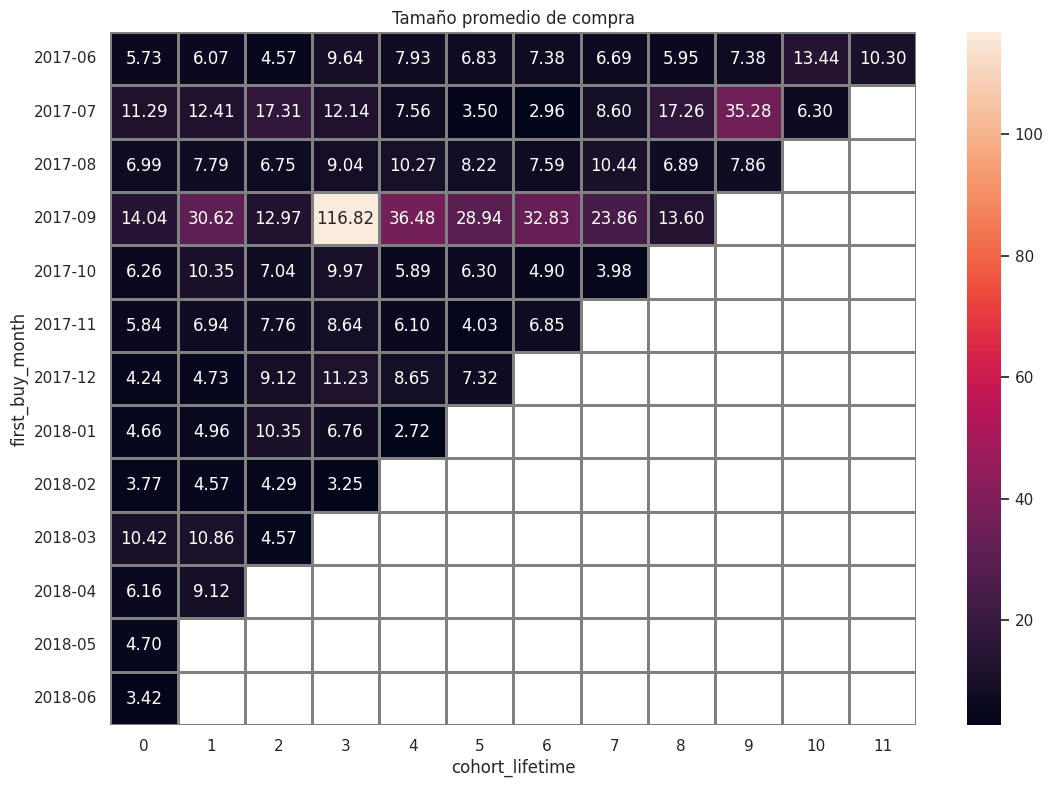

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra')
sns.heatmap(
    cohorts_revenue_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)

**Observación:** Podemos ver que el tamaño promedio de compra inicial es extremadamente alto (116.82) en la cohorte de septiembre de 2017, lo que sugiere que hubo eventos importantes o de gran popularidad en ese mes. También vemos incrementos en los meses de junio y julio de 2017, sería bueno evaluar qué tipo de eventos se realizaron para esos meses.

#### 3.4 ¿Cuánto dinero traen? (LTV)  <a id='as15'></a>

In [ ]:
# Utilizaremos nuestra tabla de buy_lifetime_revenue

buy_lifetime_revenue.head()

,uid,end_ts,start_ts,buy_ts,revenue,first_buy,buy_ts_month,first_buy_month,cohort_lifetime
0,16174680259334210214,2018-05-20 11:23:00,2018-05-20 10:59:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03,2018-03,0
1,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09,2017-09,0
2,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
3,16007536194108375387,2017-09-03 21:36:00,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10,2017-09,1
4,8056418121947262981,2018-02-06 15:50:00,2018-02-06 15:45:00,2017-06-25 08:54:00,3.67,2017-06-25 08:54:00,2017-06,2017-06,0


In [ ]:
# Filtramos los campos que nos interesa

buy_report = buy_lifetime_revenue.copy()

buy_report = buy_report.loc[:, ['uid','buy_ts_month','first_buy_month','revenue']]

display(buy_report)

,uid,buy_ts_month,first_buy_month,revenue
0,16174680259334210214,2018-03,2018-03,2.33
1,16007536194108375387,2017-09,2017-09,2.44
2,16007536194108375387,2017-10,2017-09,1.53
3,16007536194108375387,2017-10,2017-09,1.53
4,8056418121947262981,2017-06,2017-06,3.67
...,...,...,...,...
761802,18370831553019119586,2018-01,2018-01,2.93
761803,18370831553019119586,2018-01,2018-01,0.37
761804,18387297585500748294,2018-03,2018-03,0.61
761805,18388616944624776485,2017-11,2017-11,2.69


In [ ]:
# Calcularemos el número de nuevos clientes (n_buyers) para cada mes

cohort_sizes = buy_report.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()

cohort_sizes.columns = ['first_buy_month', 'n_buyers']

display(cohort_sizes)

,first_buy_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [ ]:
# Se agrupan los datos por cohorte (first_buy_month) y mes de compra (buy_ts_month) y se suman los ingresos (revenue) para cada combinación.

cohorts = (buy_report.groupby(['first_buy_month', 'buy_ts_month']).agg({'revenue': 'sum'}).reset_index())

display(cohorts)

,first_buy_month,buy_ts_month,revenue
0,2017-06,2017-06,148121.29
1,2017-06,2017-07,155869.55
2,2017-06,2017-08,114898.83
3,2017-06,2017-09,374481.76
4,2017-06,2017-10,351833.14
...,...,...,...
74,2018-03,2018-05,81254.96
75,2018-04,2018-04,39756.01
76,2018-04,2018-05,44546.21
77,2018-05,2018-05,35600.77


In [ ]:
# Combinar tamaños de cohortes con ingresos

report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')

display(report)

,first_buy_month,n_buyers,buy_ts_month,revenue
0,2017-06,2023,2017-06,148121.29
1,2017-06,2023,2017-07,155869.55
2,2017-06,2023,2017-08,114898.83
3,2017-06,2023,2017-09,374481.76
4,2017-06,2023,2017-10,351833.14
...,...,...,...,...
74,2018-03,3533,2018-05,81254.96
75,2018-04,2276,2018-04,39756.01
76,2018-04,2276,2018-05,44546.21
77,2018-05,2988,2018-05,35600.77


In [ ]:
result = report.copy()

margin_rate = 0.4

# Calcular ganancias brutas (GP)
result['gp'] = result['revenue'] * margin_rate

#  Calcular la edad de la cohorte
result['age'] = ((result['buy_ts_month'].dt.year - result['first_buy_month'].dt.year) * 12 + (result['buy_ts_month'].dt.month - result['first_buy_month'].dt.month))
result['age'] = result['age'].round().astype('int')

display(result)

,first_buy_month,n_buyers,buy_ts_month,revenue,gp,age
0,2017-06,2023,2017-06,148121.29,59248.516,0
1,2017-06,2023,2017-07,155869.55,62347.820,1
2,2017-06,2023,2017-08,114898.83,45959.532,2
3,2017-06,2023,2017-09,374481.76,149792.704,3
4,2017-06,2023,2017-10,351833.14,140733.256,4
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,81254.96,32501.984,2
75,2018-04,2276,2018-04,39756.01,15902.404,0
76,2018-04,2276,2018-05,44546.21,17818.484,1
77,2018-05,2988,2018-05,35600.77,14240.308,0


In [ ]:
result['ltv'] = result['gp'] / result['n_buyers']

#  Crear una tabla dinámica

output = result.pivot_table(
    index='first_buy_month',
    columns='age',
    values='ltv',
    aggfunc='mean').round()

display(output)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,29.0,31.0,23.0,74.0,70.0,44.0,71.0,41.0,49.0,42.0,44.0,19.0
2017-07,20.0,10.0,31.0,11.0,4.0,5.0,3.0,3.0,6.0,8.0,5.0,NaN
2017-08,14.0,12.0,10.0,12.0,20.0,9.0,7.0,15.0,6.0,5.0,NaN,NaN
2017-09,27.0,24.0,9.0,127.0,15.0,19.0,26.0,9.0,4.0,NaN,NaN,NaN
2017-10,8.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2017-11,12.0,8.0,4.0,8.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
2017-12,7.0,3.0,7.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,8.0,5.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,5.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sumando el LTV de cada cohorte (sumando las columnas de 'age' por cada mes)

df_sum = output.sum(axis=1)

# Visualiazarlo resultado en un DataFrame
df_result = pd.DataFrame({
    'total_by_month': df_sum
})

# Mostrar el resultado
display(df_result)

,total_by_month
first_buy_month,
2017-06,537.0
2017-07,106.0
2017-08,110.0
2017-09,260.0
2017-10,17.0
2017-11,38.0
2017-12,27.0
2018-01,22.0
2018-02,10.0


**Observación:**: El análisis del LTV revela una disminución progresiva en el valor de vida del cliente. Esta tendencia sugiere que las estrategias de retención actuales no están siendo lo suficientemente efectivas. Se recomienda realizar una evaluación exhaustiva y considerar nuevas iniciativas para fomentar la lealtad del cliente

# 4. Marketing  <a id='as16'></a>

#### 4.1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)  <a id='as17'></a>

In [ ]:
display(costs_us)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [ ]:
# Evaluamos si podemos extraer horas, minutos y segundos de nuestra tabla

costs_conv = costs_us.copy()

costs_conv['dt']=  pd.to_datetime(costs_conv['dt'])
costs_conv['dt_hour'] = costs_conv['dt'].dt.hour
costs_conv['dt_minute'] = costs_conv['dt'].dt.minute
costs_conv['dt_second'] = costs_conv['dt'].dt.second
display(costs_conv)

,source_id,dt,costs,dt_hour,dt_minute,dt_second
0,1,2017-06-01,75.20,0,0,0
1,1,2017-06-02,62.25,0,0,0
2,1,2017-06-03,36.53,0,0,0
3,1,2017-06-04,55.00,0,0,0
4,1,2017-06-05,57.08,0,0,0
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,0,0,0
2538,10,2018-05-28,21.26,0,0,0
2539,10,2018-05-29,11.32,0,0,0
2540,10,2018-05-30,33.15,0,0,0


**Nota:** Determinar cohortes por fechas específicas no siempre es la primera opción. En estos casos, las cohortes basadas en meses o años pueden ser útiles

In [ ]:
# Evaluando los identificadores de anuncios existentes que genero gasto de marketing

costs_unique = costs_us.copy()

costs_unique = costs_unique['source_id'].unique()

display(costs_unique)

array([ 1,  2,  3,  4,  5,  9, 10])

In [ ]:
costs_us['dt']=  pd.to_datetime(costs_us['dt'])
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [ ]:
# Extraeremos los meses y año de nuestro campo fecha

costs_date = costs_us.copy()

costs_date['dt_month'] = costs_date['dt'].dt.month
costs_date['dt_year'] = costs_date['dt'].dt.year

display(costs_date)

,source_id,dt,costs,dt_month,dt_year
0,1,2017-06-01,75.20,6,2017
1,1,2017-06-02,62.25,6,2017
2,1,2017-06-03,36.53,6,2017
3,1,2017-06-04,55.00,6,2017
4,1,2017-06-05,57.08,6,2017
...,...,...,...,...,...
2537,10,2018-05-27,9.92,5,2018
2538,10,2018-05-28,21.26,5,2018
2539,10,2018-05-29,11.32,5,2018
2540,10,2018-05-30,33.15,5,2018


In [ ]:
costs_source = costs_date.copy()

# Agrupamos por fuente, año, mes y sumamos los costos para cada grupo

costs_source = costs_source.groupby(['source_id','dt_year','dt_month']).agg({'costs': 'sum'})

display(costs_source)

costs
source_id dt_year dt_month         
1         2017    6         1125.61
                  7         1072.88
                  8          951.81
                  9         1502.01
                  10        2315.75
...                             ...
10        2018    1          614.35
                  2          480.88
                  3          526.41
                  4          388.25
                  5          409.86

[84 rows x 1 columns]

In [ ]:
costs_pivot = costs_source.copy()

# Creación de la tabla dinámica

costs_pivot = costs_pivot.pivot_table(index=['source_id','dt_year'], columns='dt_month', values='costs', aggfunc='sum')

display(costs_pivot)

dt_month                 1         2         3        4        5        6   \
source_id dt_year                                                            
1         2017          NaN       NaN       NaN      NaN      NaN  1125.61   
          2018      2186.18   2204.48   1893.09  1327.49  1467.61      NaN   
2         2017          NaN       NaN       NaN      NaN      NaN  2427.38   
          2018      4157.74   4474.34   3943.14  2993.70  2689.44      NaN   
3         2017          NaN       NaN       NaN      NaN      NaN  7731.65   
          2018     14808.78  14228.56  13080.85  9296.81  9411.42      NaN   
4         2017          NaN       NaN       NaN      NaN      NaN  3514.80   
          2018      5832.79   5711.96   5961.87  4408.49  4214.21      NaN   
5         2017          NaN       NaN       NaN      NaN      NaN  2616.12   
          2018      5371.52   5071.31   4529.62  3501.15  3669.56      NaN   
9         2017          NaN       NaN       NaN      NaN      NaN   285.22   
          2018       547.16    551.50    480.29   373.49   362.17      NaN   
10        2017          NaN       NaN       NaN      NaN      NaN   314.22   
          2018       614.35    480.88    526.41   388.25   409.86      NaN   

dt_month                7        8        9         10        11        12  
source_id dt_year                                                           
1         2017     1072.88   951.81  1502.01   2315.75   2445.16   2341.20  
          2018         NaN      NaN      NaN       NaN       NaN       NaN  
2         2017     2333.11  1811.05  2985.66   4845.00   5247.68   4897.80  
          2018         NaN      NaN      NaN       NaN       NaN       NaN  
3         2017     7674.37  6143.54  9963.55  15737.24  17025.34  16219.52  
          2018         NaN      NaN      NaN       NaN       NaN       NaN  
4         2017     3529.73  3217.36  5192.26   6420.84   5388.82   7680.47  
          2018         NaN      NaN      NaN       NaN       NaN       NaN  
5         2017     2998.14  2185.28  3849.14   5767.40   6325.34   5872.52  
          2018         NaN      NaN      NaN       NaN       NaN       NaN  
9         2017      302.54   248.93   415.62    609.41    683.18    657.98  
          2018         NaN      NaN      NaN       NaN       NaN       NaN  
10        2017      329.82   232.57   460.67    627.24    792.36    645.86  
          2018         NaN      NaN      NaN       NaN       NaN       NaN

**Observación:** El análisis de los datos de costos de marketing revela patrones distintos entre los años 2017 y 2018. La ausencia de costos en los primeros cinco
meses de 2017 contrasta con la presencia constante de costos en los últimos seis meses de 2018. Estos hallazgos pueden sugerir la existencia de variaciones estacionales
o cíclicas en las estrategias de marketing de las diferentes fuentes.

#### 4.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?  <a id='as18'></a>

In [ ]:
# Realizar la fusión de las dos tablas (visits y costs) usando la columna 'source_id'

display(costs_date)


,source_id,dt,costs,dt_month,dt_year
0,1,2017-06-01,75.20,6,2017
1,1,2017-06-02,62.25,6,2017
2,1,2017-06-03,36.53,6,2017
3,1,2017-06-04,55.00,6,2017
4,1,2017-06-05,57.08,6,2017
...,...,...,...,...,...
2537,10,2018-05-27,9.92,5,2018
2538,10,2018-05-28,21.26,5,2018
2539,10,2018-05-29,11.32,5,2018
2540,10,2018-05-30,33.15,5,2018


In [ ]:
# Filtrar tabla en visits_us

visits_filter = visits_us[['source_id', 'uid', 'start_ts_date']]


# Filtrar tabla en costs_date

costs_filter =  costs_date[['source_id', 'costs','dt']]


In [ ]:
visits_costs = pd.merge(visits_filter, costs_filter, on='source_id', how='left')
display(visits_costs)

,source_id,uid,start_ts_date,costs,dt
0,4,16879256277535980062,2017-12-20,76.74,2017-06-01
1,4,16879256277535980062,2017-12-20,59.21,2017-06-02
2,4,16879256277535980062,2017-12-20,59.39,2017-06-03
3,4,16879256277535980062,2017-12-20,161.97,2017-06-04
4,4,16879256277535980062,2017-12-20,44.65,2017-06-05
...,...,...,...,...,...
130513896,2,18396128934054549559,2017-09-10,113.35,2018-05-27
130513897,2,18396128934054549559,2017-09-10,82.67,2018-05-28
130513898,2,18396128934054549559,2017-09-10,105.75,2018-05-29
130513899,2,18396128934054549559,2017-09-10,119.26,2018-05-30


In [ ]:
visits_costs_loc = visits_costs.copy()

# Seleccionamos de la tabla unicamente los datos que nos interesa

visits_costs_loc = visits_costs.loc[:,['uid','source_id','costs','dt','start_ts_date']]

# Filtra las filas donde la fecha de costs_date esté dentro del rango de fechas de vistis_us

visits_costs_loc = visits_costs_loc[(visits_costs_loc['dt']>= visits_costs_loc['start_ts_date'])]

# Agrupamos por source_id y calculamos el CAC y el número de clientes únicos

costs_users_per_source = visits_costs_loc.groupby('source_id').agg(
    total_costs=('costs', 'sum'),
    unique_users=('uid', 'nunique')
).reset_index()

# Calculamos el CAC (Costo Total / Numero de Clientes Adquiridos)
costs_users_per_source['CAC'] = costs_users_per_source['total_costs'] / costs_users_per_source['unique_users']

# Resltado Final
print(costs_users_per_source[['source_id', 'CAC', 'unique_users']])

   source_id           CAC  unique_users
0          1  17867.873742         18999
1          2  36890.448224         26245
2          3  80014.103593         74756
3          4  34361.871333         83525
4          5  30795.935533         56974
5          9   3808.228251          9264
6         10   3119.549023          8067


**Observación** Utilizamos el filtro >=  para asegurar que solo se consideren los registros de costos y visitas que ocurren después o en el mismo día que el inicio de la campaña o evento, evitando que los costos previos a esa fecha interfieran con el análisis de adquisición de clientes. Obteniendo finalmente nuestro CAC por cliente y para cada una de las fuentes.

 #### 4.3 ¿Cuán rentables eran las inversiones? (ROMI)  <a id='as19'></a>

In [ ]:
# Filtrar tabla de visits_orders

visits_orders_filter = visits_orders[['source_id', 'revenue']]


# Hacemos union de la tabla de visits_orders y costs_filter

visits_costs_rm = pd.merge(visits_orders_filter, costs_filter, on='source_id', how='left')


# Eliminar filas con valores nulos de visits_costs_rm

visits_orders_clean = visits_costs_rm.dropna()

display(visits_orders_clean)

,source_id,revenue,costs,dt
1090,9,2.33,13.06,2017-06-01
1091,9,2.33,18.13,2017-06-02
1092,9,2.33,7.06,2017-06-03
1093,9,2.33,4.65,2017-06-04
1094,9,2.33,15.30,2017-06-05
...,...,...,...,...
371832831,2,1.22,113.35,2018-05-27
371832832,2,1.22,82.67,2018-05-28
371832833,2,1.22,105.75,2018-05-29
371832834,2,1.22,119.26,2018-05-30


In [ ]:
romi_data = visits_orders_clean.copy()

# Calcula el total costs y revenue por source_id (dentificador de la fuente de anuncios)

romi_data = romi_data.groupby('source_id').agg(
    total_costs=('costs', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

# Calcular ROMI usando las columnas combinadas

romi_data['ROMI'] = (romi_data['total_revenue'] - romi_data['total_costs']) / romi_data['total_costs']

# Mostrar el resultado

display(romi_data)

,source_id,total_costs,total_revenue,ROMI
0,1,5.180443e+09,8.342467e+08,-0.838962
1,2,1.020055e+10,9.576627e+08,-0.906117
2,3,6.609047e+09,1.076977e+08,-0.983705
3,4,3.828276e+09,1.802985e+08,-0.952903
4,5,7.857970e+09,4.300577e+08,-0.945271
5,9,5.267548e+07,1.319224e+07,-0.749556
6,10,2.344717e+07,5.306780e+06,-0.773671


**Observación:** Podemos observar que el ROMI es negativo lo que nos indica que los ingresos son menores que los gastos incurridos, por lo que las campañas realizadas no estan alcanzado la audiencia necesaria.

# 5. Calculando algunas métricas ya realizadas por dispositivo y fuentes  <a id='as20'></a>

#### 5.1. Calcular Usuarios únicos por dispositivos y fuente adquisición  <a id='as21'></a>

In [ ]:

total_ds = visits_us.groupby(['device','source_id']).agg({'uid': 'nunique'})

total_ds.head(n=10)

uid
device  source_id       
desktop 1          13172
        2          18257
        3          57420
        4          55607
        5          42053
        6              5
        7             26
        9           7079
        10          5763
touch   1           6094

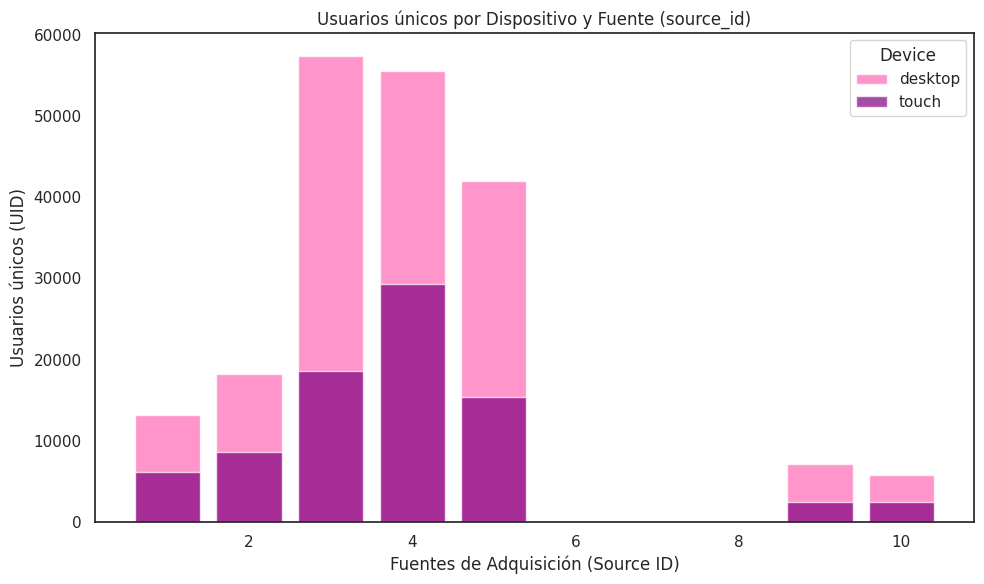

In [ ]:

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))

# Como tenemos un indice multinivel utilizamos index y luego get_level_values
devices = total_ds.index.get_level_values('device').unique()

# Configurar colores para cada dispositivo
colors = {'desktop': 'hotpink', 'touch': 'purple'}

# Itera sobre cada dispositivo en la lista devices
for device in devices:
    # Crea una máscara booleana que identifica las filas donde el nivel 'device' coincide con el valor actual de device en el bucle
    subset = total_ds.loc[total_ds.index.get_level_values('device') == device]
    # Obtiene los valores del nivel 'source_id' del índice del subconjunto subset. Estos valores se usan como las posiciones en el eje X para las barras.
    ax.bar(subset.index.get_level_values('source_id'), subset['uid'], label=device, color=colors[device], alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Fuentes de Adquisición (Source ID)')
ax.set_ylabel('Usuarios únicos (UID)')
ax.set_title('Usuarios únicos por Dispositivo y Fuente (source_id)')
ax.legend(title='Device')

# Mostrar gráfico
plt.tight_layout()
plt.show()

#### 5.2. Dinero gastado por dispositivos y fuente adquisición  <a id='as22'></a>

In [ ]:
#Filtrar tabla en visits_us

visits_ds = visits_us[['source_id', 'device']]


# Filtrar tabla en costs_date

costs_ds =  costs_date[['source_id','costs']]


visits_costs_ds = pd.merge(visits_ds,costs_ds, on='source_id',how='left')

display(visits_costs_ds)

,source_id,device,costs
0,4,touch,76.74
1,4,touch,59.21
2,4,touch,59.39
3,4,touch,161.97
4,4,touch,44.65
...,...,...,...
130513896,2,touch,113.35
130513897,2,touch,82.67
130513898,2,touch,105.75
130513899,2,touch,119.26


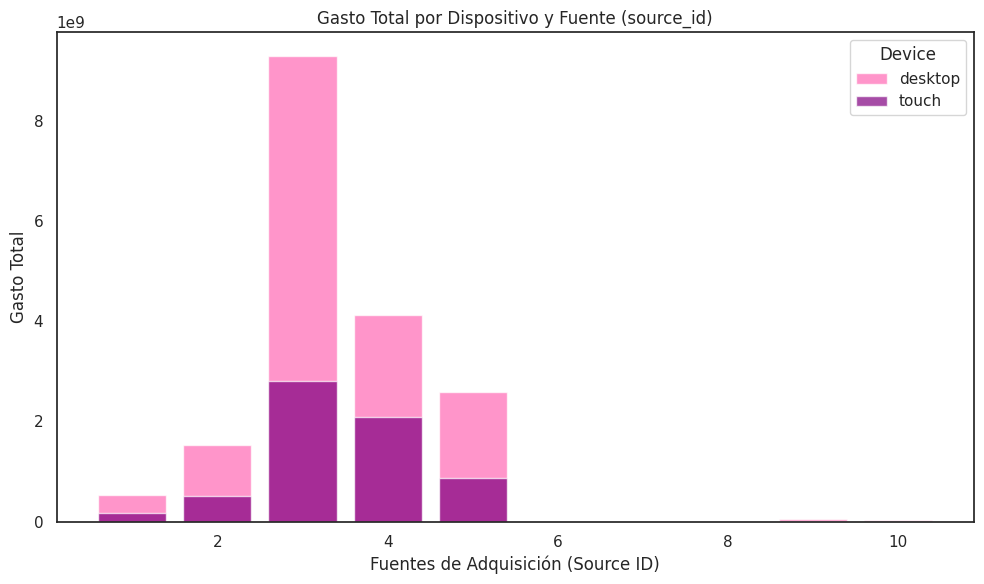

In [ ]:
#Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))


# Agrupar por dispositivo y fuente, y luego sumar los costos
grouped_data = visits_costs_ds.groupby(['device', 'source_id'])['costs'].sum().reset_index()


# Configurar colores para cada dispositivo
colors = {'desktop': 'hotpink', 'touch': 'purple'}

# Iterar sobre cada dispositivo en la lista devices
for device in grouped_data['device'].unique():
    subset = grouped_data[grouped_data['device'] == device]
    ax.bar(subset['source_id'], subset['costs'], label=device, color=colors[device], alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Fuentes de Adquisición (Source ID)')
ax.set_ylabel('Gasto Total')
ax.set_title('Gasto Total por Dispositivo y Fuente (source_id)')
ax.legend(title='Device')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# 6. Conclusiones <a id='as22'></a>

El análisis de los datos de usuarios revela un promedio de 1.1 sesiones por día, con una duración promedio de 60 segundos. Aunque la cantidad de compras por sesión no se detalla, el bajo LTV y el ROMI negativo sugieren que las estrategias actuales de retención y adquisición no son óptimas.

El embudo de conversión muestra que los usuarios tienden a comprar a partir del segundo día, con un pico en las compras iniciales. Sin embargo, la variabilidad en la cantidad de pedidos a lo largo del tiempo y la disminución del LTV indican una necesidad de mejorar la retención de clientes.

Los datos de costos de marketing revelan patrones estacionales y una correlación entre el gasto en marketing y el volumen de ventas en ciertos períodos. Sin embargo, el ROMI negativo indica que las campañas de marketing no están generando el retorno de inversión deseado.

Conclusiones clave:

- Retención: Es necesario implementar estrategias más efectivas para retener a los clientes y aumentar su valor de vida.

- Adquisición: Las campañas de marketing deben ser optimizadas para mejorar el retorno de inversión y atraer a un público más segmentado.

- Experiencia del usuario: Se debe analizar la experiencia del usuario en el sitio web para identificar posibles puntos de fricción que puedan estar disuadiendo a los usuarios de realizar compras.